### Braided Atom Dynamics

This notebook is based off of PRL 120, 140404 (2018), titled "Decoherence-Free Interaction between Giant Atoms in Waveguide" 

We'll see how much progress I get...
starting with modified frequency by Lamb shift, 
$\omega_{j}^{\prime}=\omega_{j}+\delta \omega_{j}$
##### Master Equation
$$ \begin{aligned} \dot{\rho}=&-i\left[\omega_{a}^{\prime} \frac{\sigma_{z}^{a}}{2}+\omega_{b}^{\prime} \frac{\sigma_{z}^{b}}{2}+g\left(\sigma_{-}^{a} \sigma_{+}^{b}+\sigma_{+}^{a} \sigma_{-}^{b}\right), \rho\right] \\ &+\Gamma_{a} \mathcal{D}\left[\sigma_{-}^{a}\right] \rho+\Gamma_{b} \mathcal{D}\left[\sigma_{-}^{b}\right] \rho \\ &+\Gamma_{\text { coll }}\left[\left(\sigma_{-}^{a} \rho \sigma_{+}^{b}-\frac{1}{2}\left\{\sigma_{+}^{a} \sigma_{-}^{b}, \rho\right\}\right)+\mathrm{H.c.}\right] \end{aligned} $$
##### Driving Term Added to the Hamiltonian 
I am making considerable adaptations to the Hamiltonian by adding a driving term, following the theory described in PHYSICAL REVIEW A 88, 043806 (2013) 
They have 
\begin{equation}
\begin{aligned} H / \hbar=& \sum_{j} \Delta_{j}\left|e_{j}\right\rangle\left\langle e_{j}\right|+\sum_{j}\left(\epsilon_{j} \sigma_{+}^{j}+\mathrm{H.c.}\right) \\ &+g\left(\sigma_{-}^{1} \sigma_{+}^{2}+\sigma_{+}^{1} \sigma_{-}^{2}\right) \end{aligned}
\end{equation} 
and 
\begin{equation}
\epsilon_{j}=-i \sqrt{\frac{\gamma_{0 j, 0 j} \omega_{d}}{2 \omega_{0 j}}}\left\langle a_{\mathrm{in}}^{\mathrm{L}}\right) e^{-i \omega_{d} t_{j}}
\end{equation}
I'll write down my thoughts through the three terms in the Hamiltonian.  The first is almost the same $\sigma_z$ term. Perhaps by switching to the RWA or by driving I am only considering the excited state? Confused at this one. 
The second is believable. There is a driving strength and it excites qubits. The amplitude is complex, which is weird, it has a time dependence, which is weird, and the input expectation value could be anything I suppose, also weird. 
The third term at the very least is identical, ( I replaced J with g ) so I can believe that. 
##### Decay Operators & Parameters
Frequency Shift $  d\omega_j = \gamma \sin (2 \varphi) $ 

Exchange Interaction $ g = (\gamma / 2)(3 \sin \varphi+\sin 3 \varphi) $

Individual Decay $ \Gamma_j = 2 \gamma ( 1 + \cos (2 \varphi ) )$ 

Collective Decay $ \Gamma_{coll} = (\gamma / 2)(3 \cos \varphi+\cos 3 \varphi) $

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [11]:
def ham(phi, omega_d, omega_a, omega_b, gamma):
    #importing decay rates
    gamma_a = gamma*2*(1+np.cos(2*phi))
    gamma_b = gamma_a
    gamma_c = (gamma/2)*(3*np.cos(phi)+np.cos(3*phi))
    # defining coefficents
    delta_omega = gamma*np.sin(2*phi)                  # frequency shift
    g =(gamma / 2) *(3*np.sin(phi)+np.sin(3*phi))      # interaction strength
    #define Hamiltonian
    H = (omega_a+delta_omega)/2*tensor(sigmaz(),qeye(2))+ \
    (omega_b + delta_omega)/2*tensor(qeye(2),sigmaz()) \
    + g*(tensor(sigmam(),sigmap())+tensor(sigmap(),sigmam())) \
    # equations to simulate loss
    decay_1 = gamma_a * tensor(sigmam(),qeye(2))
    decay_2 = gamma_b * tensor(qeye(2),sigmam())
    decay_3 = gamma_c * lindblad_dissipator(tensor(sigmam(),qeye(2)),tensor(qeye(2),sigmam()))
    decay_4 = gamma_c * lindblad_dissipator(tensor(sigmap(),qeye(2)),tensor(qeye(2),sigmap()))
    # not yet translated from master equation
    return H, [decay_1,decay_2,decay_3,decay_4]

In [18]:
H, c_op_list = ham(1,0,6.5,4.3,1)
print(H.eigenenergies())

[-6.30929743 -1.72808174  1.72808174  6.30929743]


In [9]:
def ham_driven(phi, omega_d, omega_a, omega_b, gamma, amp_in):\
    # making density matrix of e
    e = basis(2, 0)
    g = basis(2, 1)
    #importing decay rates
    gamma_a = gamma*2*(1+np.cos(2*phi))
    gamma_b = gamma_a
    gamma_c = (gamma/2)*(3*np.cos(phi)+np.cos(3*phi))
    # defining coefficents
    delta_omega = gamma*np.sin(2*phi)                  # frequency shift
    g =(gamma / 2) *(3*np.sin(phi)+np.sin(3*phi))      # interaction strength
    epsilon_a = -1j*np.sqrt(gamma_a*omega_d/(2*omega_a))*amp_in
    epsilon_b = -1j*np.sqrt(gamma_b*omega_d/(2*omega_b))*amp_in
    #define Hamiltonian
    H= (omega_a+delta_omega -omega_d)/2*tensor(e*e.dag(),qeye(2))+ \
    (omega_b + delta_omega - omega_d)/2*tensor(qeye(2),e*e.dag()) \
    + g*(tensor(sigmam(),sigmap())+tensor(sigmap(),sigmam())) \
    + epsilon_a*(tensor(sigmap(),qeye(2)))+ np.conj(epsilon_a)*(tensor(sigmam(),qeye(2))) \
    + epsilon_b*(tensor(qeye(2),sigmap()))+ np.conj(epsilon_b)*(tensor(qeye(2),sigmam())) 
    
    # equations to simulate loss
    decay_1 = gamma_a * tensor(sigmam(),qeye(2))
    decay_2 = gamma_b * tensor(qeye(2),sigmam())
    decay_3 = gamma_c * lindblad_dissipator(tensor(sigmam(),qeye(2)),tensor(qeye(2),sigmam()))
    decay_4 = gamma_c * lindblad_dissipator(tensor(sigmap(),qeye(2)),tensor(qeye(2),sigmap()))
    # not yet translated from master equation
    return H, [decay_1,decay_2,decay_3,decay_4]


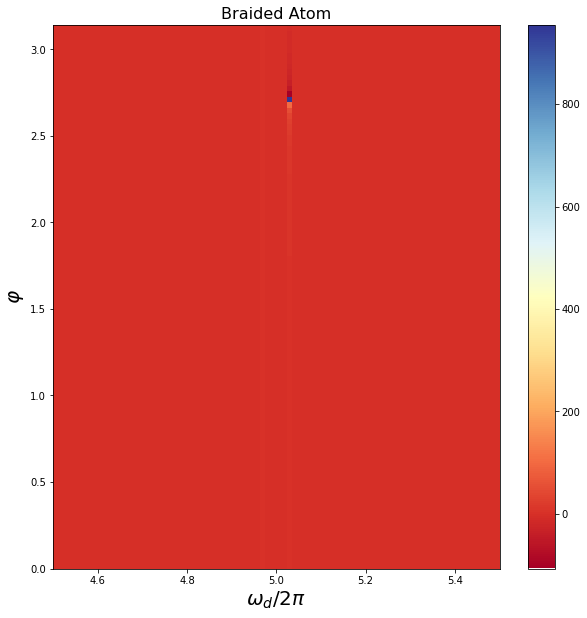

done a round


In [19]:
# sweep parameters
N = 60  # size of X grid
M = 60  # size of Y grid
gamma = 1
amp_in = 2 * 2* np.pi 
# define excitation population
e_pop = np.zeros([M,N])
#omega_a = np.linspace(-40*np.pi,40*np.pi,N+1)  # Probe frequency detuning
#omega_b = np.linspace(-40*np.pi,40*np.pi,M+1)  # Coupler frequency detuning
omega_a = 6.5*2*np.pi 
omega_b = 6.2*2*np.pi
omega_array = np.linspace(4.5*2*np.pi,5.5*2*np.pi, N)
phi_array = np.linspace(0, np.pi,M )
state = tensor(sigmax(),sigmax()) 
# spectograph sweep
for i in range(N):
    for j in range(M):
        H, c_op_list = ham(phi_array[i], omega_array[j],omega_a, omega_b,gamma, amp_in)
        result = steadystate(H, c_op_list)
        e_pop[j,i] =  expect(state, result) 

# plotting functionality
fig, ax = plt.subplots( figsize = (10 ,10))
#np.savetxt('detuning_Ap5_Oc400_test.txt' ,e_pop, fmt= '%f' , delimiter= ',' )
plot = ax.pcolor(omega_array/(2*np.pi),phi_array, e_pop, edgecolors= 'none' )
plot.set_cmap ('RdYlBu')
ax.set_ylabel(r'$\varphi$', fontsize=20)
ax.set_xlabel(r'$\omega_{d}/2\pi$', fontsize=20)
ax.axis('tight')
ax.set_title('Braided Atom', fontsize=16)
plt.colorbar(plot)
plt.savefig('braid_0.png')
plt.show()
print('done a round')
